# Simulation of Epidemological SIR-Model

`English version last change on 2020-08-13; German version created on 2020-04-02; author: Olaf Behrendt`

**Contents**

* [Preface](#Preface)
* [Introduction](#Introduction)
   * [An Illustrative First Example](#An-Illustrative-First-Example)
   * [Motivation of State Transition Rates](#motivation-of-state-transition-rates)
* [Dynamics of the SIR-model](#Dynamics-of-the-SIR-model)
   * [System of Differential Equations](#System-of-Differential-Equations)
      * [Verbalization of SIR system of ODEs](#Verbalization-of-SIR-system-of-ODEs)
   * [Euler Method](#Euler-Method)
* [Implementation of Euler's Method](#Implementation-of-Euler's-Method)
   * [Preparations](#Preparations)
   * [Calculate Time Step](#Calculate-Time-Step)
   * [Main Function and Plotting](#Main-Function-and-Plotting)
* [Simulations](#Simulations)
   * [Parameters for SARS-CoV-2](#Parameters-for-SARS-CoV-2)
   * [Running the Simulations](#Running-the-Simulations)
   * [Summary of Scenario Simulations](Summary-of-Scenario-Simulations)
* [Glossary](#Glossary)

## Preface

In the following presentation we introduce a classical model for the development of an infectious deseases, the SIR-model. It was first published in 1927 in the proceedings of the Royal Society by Scottish biochemist [William Ogilvy Kermack](https://en.wikipedia.org/wiki/William_Ogilvy_Kermack) and [Anderson Gray McKendrick](https://en.wikipedia.org/wiki/Anderson_Gray_McKendrick). McKendrick was a physican and did not have a mathematical degree, nervertheless he was a brilliant mathematician and pioneer in mathematical epidemiology. Apart from beeing a biochemist William Kermak also had a degree in mathematics. He survived the active service in the first world war, but unfortunately was blinded by a labratory experiment at the age of 26. 

I am trying to present the SIR-model in an most accessible way, so that anyone having had basic calculus at secondary school should have no difficulties. Specifically we some general familarity with simple equations, functions and elementary probability. But even if the technical hurdles are quite low, the reader probably has to spent some amount of time and concentration to follow the presentation. Anyways, if the reader has issues understanding the text, in doubt, the author has failed to clearly and consistently express his thoughts.

An important part and probably the most "enjoyable" part of this notebook are the simulations using Python. The reader can change parameters and re-run simulation, so that she gets a better intuitive understanding of the quantitative nature of the model. The adventurous reader can even change or extend the SIR-model to his likings (e.g. add an compartmen/equation for the SEIR-model).

## Introduction

The SIR-model (**s**usceptible-**i**nfected-**r**emoved model) is a mathematical model describing the temporal devolpment of an infectious desease with immunization. An individual of the considered population of size $N$ resides in exactly one of three groups or compartments at a certain point of time:

* $S(t)$ is the number of **susceptible** individuals at time point $t$. An individual is susceptible if she can be infected.
* $I(t)$ is the number of **infected** individuals at time point $t$. 
* $R(t)$ is the number of **recovered** individuals at time point $t$. We assume that recovered individuals are **immune**, that is an recovered individual will remain in state _recovered_ forever.

It is clear that the sum $S(t)+I(t)+R(t)=N$ is constant for all $t$ in the considered time range. Also note that we regard deceased individuals as _recovered_, which might seem a bit strange at first glance.

### An Illustrative First Example

At the start of the simulation $t=0$ we assume ten infected individuals in a population of size $N=1000$ (e.g. a village). So $S(0)=990$, $I(0)=10$, $R(0)=0$.
Further we need some assumptions about the _contact rate_ $\beta$ and _recovery rate_ $\gamma$, two important terms we will shortly introduce in more detail.
Please note that we cut of the digits after the decimal point, so we might observe some rounding errors.

![](sir-ex1-en.png)

$$
\begin{array}{r|r|r|r|r|r}
\text{day } t & S(t) & I(t) & R(t) & \text{new infects}\\
\hline
 0 & 990 & 10 & 0 & 0\\
 1 & 980 & 17 & 3 & 10\\
 2 & 964 & 27 & 9 & 16\\
 3 & 938 & 44 & 18 & 26\\
 4 & 896 & 71 & 33 & 42\\
 5 & 832 & 112 & 57 & 64\\
 6 & 739 & 167 & 94 & 93\\
 7 & 616 & 235 & 149 & 124\\
 8 & 471 & 301 & 228 & 145\\
 9 & 329 & 343 & 328 & 142\\
10 & 216 & 341 & 442 & 113\\
11 & 143 & 301 & 556 & 74\\
12 & 100 & 244 & 657 & 43\\
13 & 75 & 187 & 738 & 24\\
14 & 61 & 139 & 800 & 14\\
15 & 53 & 101 & 846 & 8\\
16 & 47 & 73 & 880 & 5\\
17 & 44 & 52 & 904 & 3\\
18 & 42 & 37 & 921 & 2\\
19 & 40 & 26 & 934 & 2\\
20 & 39 & 18 & 942 & 1\\
21 & 38 & 13 & 949 & 1\\
22 & 38 & 9 & 953 & 0\\
23 & 38 & 6 & 956 & 0\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
\end{array}
$$

For more thourough background on compartemental models in general, please refer to [The Mathematics of Infectious Diseases, H.W. Hethcote, 2000 in SIAM Rev., 42(4), 599–653.](https://epubs.siam.org/doi/abs/10.1137/s0036144500371907).

### Assumptions and Definitions

Let us now introduce a more exact description of the SIR-model together with some adequate assumptions in order to better understand its motivation and dynamics.

* Following state transitions are possibly: $S\rightarrow I\rightarrow R$. In other words, if a susceptible individual in compartment $S$ is infected he moves into compartment $I$. Then, after some time, he recovers (or deceases) and finally moves into compartment $R$. Especially we assume that immunity does not wear off with time, that is there is no transition from state _recovered_ to state _susceptible_.
* $S(t)+I(t)+R(t)=N$ (or all $t\geq 0$). That means we do not consider births or deaths or any other demographic changes or travel etc..
* If an individual is infectied he is instantly infectious. This is a simplification since usually an infected individual only becomes infectious after the [_pre-infectious period_](#latent-period).
* Usually the unit of a time period is one day.
* $\pmb\beta$ (beta) **contact rate** or spreading rate or **infection rate** is the average number of contacts of an infected individual per unit of time. E.g., a contact rate of $\beta=1.0$ means that an infected individual on average infects one other person per day. The contact rate is implicitly composed of several factors, like
   * The (biological) infectivity of the pathogene
   * The number of contacts of an infected person with susceptible persons. Let us assume the infectivity is to transfer the desease is $0.25\%$. Then the probability of infection when the infected individual meets two susceptible persons a day is $1-(0,75)^2\approx 44\%$, when meeting five susceptible persons a day it is about $76\%$ and so on. Also note that if a large proportion of the population is immune, the contact rate will dramatically decrease, which is called [herd immunity](https://en.wikipedia.org/wiki/Herd_immunity).
   * There are a lot more factors effecting the contact rate, like duration of contact, proximity or locality (in the open or in a closed room), wearing face masks, ventilation, temperature, huminidy, etc..
   
 
* $\pmb\gamma$ (gamma) **recovery rate** is the rate at which an infected person recovers. More precisely formulated, we can assume that the the time periods for a change from compartment $I$ to compartment $R$ are [exponetially distributed](https://en.wikipedia.org/wiki/Exponential_distribution). This means that the mean duration in compartment $I$ is equal to $1/\gamma$ and that the probability after $t$ units of time is equal to $\exp(-\gamma t)$. For example if we assume $\gamma=0.2$, then we have a mean duration period in compartment $I$ of $D_I=1/\gamma=1/0.2=5$ days. The probabilty that a person is still infectious after one day is $exp(-0.2)\approx 0.82$ and that person is still infectious after five days is $exp(-0.2\cdot5)\approx 0.37$ and so on. The technicalities are not so important for the further understanding. The take-away point here is that 
$$1/\gamma = D_I$$
constitutes the **mean infectious period**. Also note that the SIR-model does not explicitly model a [pre-infectious period](#pre-infectious-period) (but it can quite easily be extended into a SEIR-model).
* The **[basic reproduction number](https://en.wikipedia.org/wiki/Basic_reproduction_number)** $R_0$ is defined as the average number of secondary infections produced by
a single infected individual introduced into a completely susceptible population. If infection rate $\beta$ and recovery rate $\gamma$ are equal, then the overal number of infected persons is constant (on average). If $\beta > \gamma$ the average number of infections rises and for $\beta < \gamma$ the average number of infections drops. For the SIR-model it holds that 

  $$
  R_0=\frac{\beta}{\gamma}.
  $$

## Motivation of State Transition Rates

Let us denote the population size by $N$. 
Then the total number of transitions $S\rightarrow I$, or in other words the number of individuals who get infected during a time period is given by

$$S\left[\beta\left(\frac{I}{N}\right)\right] = \frac{\beta IS}{N}.$$

But how can we motivate the left side of the above equation (the right side is just a simple reformulation)? Let's break down the expression on the left hand side of the above equation:

* Since $N$ is the total population size we can interprete $\frac{I}{N}$ as the [classical probability](https://en.wikipedia.org/wiki/Probability_interpretations#Classical_definition) (sometimes also called _Laplace probability_) for the random event _"contact with an infected individual"_. 
* It follows that $\beta\frac{I}{N}$ is the probability to meet an infected individual **and** to get infected.
* But only susceptible individuals can be infected, so that the average number of newly infected individuals is given by $S\left[\beta\left(\frac{I}{N}\right)\right] = \frac{\beta IS}{N}$. Voilà.
  
To sum up, per unit time period a total of $\beta IS\over N$ individuals transition from compartment $S$ into compartment $I$, which we write as $S\stackrel{\beta\cdot IS\over N}\longrightarrow I$.
The average number of recovered individuals per unit time period is given by $\gamma I$ so we can write all transitions in the SIR-model as

$$S\stackrel{\beta IS\over N}\longrightarrow I \stackrel{\gamma I}\longrightarrow R.$$

## Dynamics of the SIR-model

### System of Differential Equations

We can model the [dynamics](#dynamical-system) of the SIR-model $-$ or more specifically the evolution of the numbers of individuals in the respective compartments as a function of time $-$ as a system of three [ordinary differential equations](#ordinary-differential-equation) (ODEs) as shown below. If you don't know what an ODE is, don't worry, just keep on reading, you should get an sufficient intuitive understanding.

$$
\begin{aligned}
{\frac {dS(t)}{dt}} &= -{\beta I(t)S(t)\over N}\\
{\frac {dI(t)}{dt}} &= {\beta I(t)S(t)\over N}-\gamma I(t)\\
{\frac {dR(t)}{dt}} &= \gamma I(t)
\end{aligned}
$$

#### Verbalization of SIR system of ODEs

We can regard $\frac {df(t)}{dt}$ as the change in the value of the function $f$ in a ("very short") time period $dt$. So we can verbalize the three equations above in the following way:

* The number of **susceptible** individuals $S(t)$ is reduced by the number of newly infected $\beta I(t)S(t)\over N$ during time period $dt$.
* The number of **infected** $I(t)$ is increased by the number of newly infected $\beta I(t)S(t)\over N$ and decreased by the newly recovered individuals $\gamma I(t)$ during time period $dt$.
* The number of **recovered** $R(t)$ is increased by the number of newly recovered individuals $\gamma I(t)$ during time period $dt$.

Not that our requirenment $S(t)+I(t)+R(t)=N$ for all $t$ from section [Assumptions und Definitions](#Assumptions-and-Definitions) is fullfilled, since for each time step the total number of individuals does not change:

$${dS(t)\over dt}+{dI(t)\over dt}+{dR(t)\over dt}= -{\beta I(t)S(t)\over N} + \left({\beta I(t)S(t)\over N}-\gamma I(t)\right) + \gamma I(t) = 0.$$

### Euler Method

How can we solve the SIR ODE system? It turns out we can use the [Euler method](https://en.wikipedia.org/wiki/Euler_method) (named after Swiss mathematician Leonhard Euler 1707-1783) to numerically solve the ODEs. 

Remember from school, that $\frac {df(t)}{dt}=f'(t)$ is the [derivative](https://en.wikipedia.org/wiki/Derivative) of the function $f$. For example for a quadratic function $f(x)=ax^2+bx+c$ the derivative $f'$ is a straight line $\left(f'(x)=2ax+b\right)$. Locally we can approximate a function with the help of its first derivative: For a quadratic function, the first derivative is a straight line and we can approximate $f$ at any x-value $x_0$ by a straight line going through the coordinate $\left(x_0,f(x_0)\right)$ with gradient $f'(x_0)$. This is also called a (first-order) [Taylor approximation](https://en.wikipedia.org/wiki/Taylor%27s_theorem) (Brook Taylor was an English mathematician who lived 1685 - 1731). For a differentiable function $f$ the first Taylor approximation in point $x_0$ formally looks like this:

$$
f(x_0+h)\;\approx\; f(x_0)+f'(x_0)h \;\overset{\text{def}}=\; f(x_0)+{df(x_0)\over dt}h
$$

A picture may be better than a many words:

<p><figure>
<img style="width: 40%" src="1sttaylor.png" alt="Illustration Taylor approximation">
    
<!-- <figcaption>A drawing to illustrate the Taylor approximation.</figcaption> -->
</figure></p>
<!-- ![](1sttaylor.png) -->

Now we can drop the above formulated [SIR ODEs](#Dynamics-of-the-SIR-model) into the first-order Taylor approximation and arrive at the Euler method to [iteratively (step by step)](https://en.wikipedia.org/wiki/Iteration) calculate (approximate) values of the SIR variables:

$$
\begin{aligned}
   S_{k} &= S_{k-1} + \Delta t \left(-{\beta I_{k-1} S_{k-1}\over N}\right),\\
   I_{k} &= I_{k-1} + \Delta t \left({\beta I_{k-1} S_{k-1}\over N}-\gamma I_{k-1}\right),\\
   R_{k} &= S_{k-1} + \Delta t \left(\gamma I_{k-1}\right),
\end{aligned}
$$
where we define

* $S(t_{k-1}) := S_{k-1}$ and so forth for a more convenient notation, and
* $\Delta t := t_{k+1}-t_k$ for $k=0,1,2,\ldots$.

At start of simulation $k=0$ we have to set the start values appropriately, e.g. $S_0=N-I_0-R_0$, $I_0>0$ and $R_0=0$.


<!--
$$
\begin{aligned}
   S_{k} &= 
       \begin{cases}
       S_0=N-I_0-R_0  & \text{if } k=0\\
       S_{k-1} + \Delta t \left(-{\beta I_{k-1} S_{k-1}\over N}\right) & \text{if }k>0
       \end{cases}\\
   I_k &=
        \begin{cases}
       I_0 > 0  \text{ (otherwise the desease can not spread)} & \text{if } k=0\\
       I_k + \Delta t \left({\beta I_{k-1} S_{k-1}\over N}-\gamma I_{k-1}\right) & \text{if }k>0
       \end{cases}\\  
   S_{k} &= 
       \begin{cases}
       R_0  & \text{if } k=0\\
       R_k = S_{k-1} + \Delta t \left(\gamma I_{k-1}\right) & \text{if }k>0
       \end{cases}
\end{aligned}
$$
-->


> Aside: Often the Euler method ist introduced by integrating the ODE and performing a _box approximation_ of the integral. I think the above motivation using first-order Taylor approximations might be better suited, since it is more elementary. 

## Implementation of Euler's Method

### Preparations

In a first step we import two libraries that we want to use and also set some parameters for `pyplot`. `matplotlib` is responsible for creating plots and `numpy` is adding advanced numerical functionality, e.g arrays and matrices.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Calculate Time Step

Using Euler's method from above it is straight-forward to implement a function calculating SIR values for the next time step.

In [2]:
### Function to calculate the change of value during a time step
def step_calc(S,I,R,newI,beta,gamma,i):
    Delta_S = - beta * I[i] * S[i] / N * Delta_t
    Delta_R = gamma * I[i] * Delta_t
    Delta_I = - Delta_S - Delta_R
    S[i+1] = S[i] + Delta_S 
    I[i+1] = I[i] + Delta_I
    R[i+1] = R[i] + Delta_R
    newI[i+1] += -Delta_S
    #print("%2d & %.0f & %.0f & %.0f & %.0f\\\\" % (i+1, S[i+1]*num, I[i+1]*num, R[i+1]*num, newI[i+1]*num))

### Main Function and Plotting

We still need a main function `simulate()` which calculates all SIR values step by step using above function `step_calc()`:

In [3]:
def simulate(beta,gamma):
    ### initializations
    global S,I,R,newI
    S = np.zeros(n); I = np.zeros(n); R = np.zeros(n); newI = np.zeros(n) # initialize arry of length n
    I[0] = I0
    R[0] = R0
    S[0] = N - I[0] - R[0]
    ### iteration loop
    for t in range(0, n-1):
        #print("%2d & %.0f & %.0f & %.0f\\\\" % (t, S[t]*N, I[t]*N, R[t]*N))
        step_calc(S,I,R,newI,beta,gamma,t)

## Simulations

We will run three different simulations for the spread of SARS-CoV-2 infection. 

1. First wie use the basic reproduction number $R_0=3.0$.
   We observe approximately a maximum of 26 million infected persons at the peak.
   If we conservatively assume only %$1\%$ rate of intensive care patients, then $250,000$ thousand beds in ICUs
   are needed.
2. Then we change the reproduction number to $R_0=1.5$. 
   Now "only" about $5.0\text{ million }\cdot 1\%=50,000$ ICU beds are needed (still exceeding German ICU capacity, which is about 35,000 in total).
3. Using basic reproduction number $R_0=1.0$ leads to a constant scenario, where
   the number of infected approximately equals the starting number.

### Parameters for SARS-CoV-2

For simulations we will use parameters from the 2020 SARS-CoV-2 pandemic to derive values for $\beta$, $\gamma$ and $R_0$. Often only 
$R_0$ and $D_I$ are are available, from which we can readily deduce the model parametrs $\gamma=1/D_I$ and $\beta=\gamma\cdot R_0$ (see section [Assumptions and Definitions](#Assumptions-and-Definitions)). Here are some parameter values from the literature we can use for our simulations:

$$
\begin{array}{l|r|r|r|r}
\textbf{Source}                          & \pmb{D_I} & \pmb{\gamma}\text{ (Tage)} & \pmb{R_0} & \pmb{\beta}\\
\hline
\text{RKI from 3. April 2020 (1)}       &          7,0 &                      0.14 &          3,0 &        0.42\\
\text{Kucharski et.al, 26. Feb 2020 (2)} &          5,2 &                      0.19 &          2,5 &        0.48\\
\text{Dehning et.al. 2. Apr 2020 (3)}    &          8,0 &                      0.125 &         3.3 &        0.41
\end{array}
$$

**Comments** 

* In (1) [RKI (Robert Koch Institut in German)]((https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Steckbrief.html?nn=13490888)) we used 
the mean time between contracting of desease and hospitalization (_Zeit von Erkrankungsbeginn bis Hospitalisierung_) for $D_I$. This seems to be a conservative (low-risk) assumption.
* For (3) Dehning et.al. we used "delay in days between contracting the disease and being recorded" for $D_I$. It seems unclear how the authors motivated $D_I \approx \text{ reporting delay}$? We recall, that $D_I$ is defined as the the mean [infectious period](#infectious-period) ...

**Links**

* (1) [Steckbrief zur Coronavirus-Krankheit-2019 (COVID-19)](https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Steckbrief.html?nn=13490888)
* (2) [Analysis and projections of transmission dynamics of nCoV in Wuhan](https://www.thelancet.com/journals/laninf/article/PIIS1473-3099(20)30144-4/fulltext), [Github Parameters](https://cmmid.github.io/topics/covid19/current-patterns-transmission)
* (3) [Inferring COVID-19 spreading rates and potential change points for case number forecasts, 2020-04-02](https://arxiv.org/abs/2004.01105)


In [4]:
### start values
beta    = 0.41         # contact rate, can be detrmined as beta = R_0 * gamma
gamma   = 0.125        # recovery rate as 1/D_I and D_I the mean infectious period 
N       = 83e6         # population  in your in Germany (put in your country of choice)
I0      = 50000         # infected persons at start of simulation
R0      = 1000000      # number of recovered (non-infectious)
n       = 200          # number of time steps 
Delta_t = 1            # length of time interval in days (simulation length = n * Delta_t)

### Running the Simulations

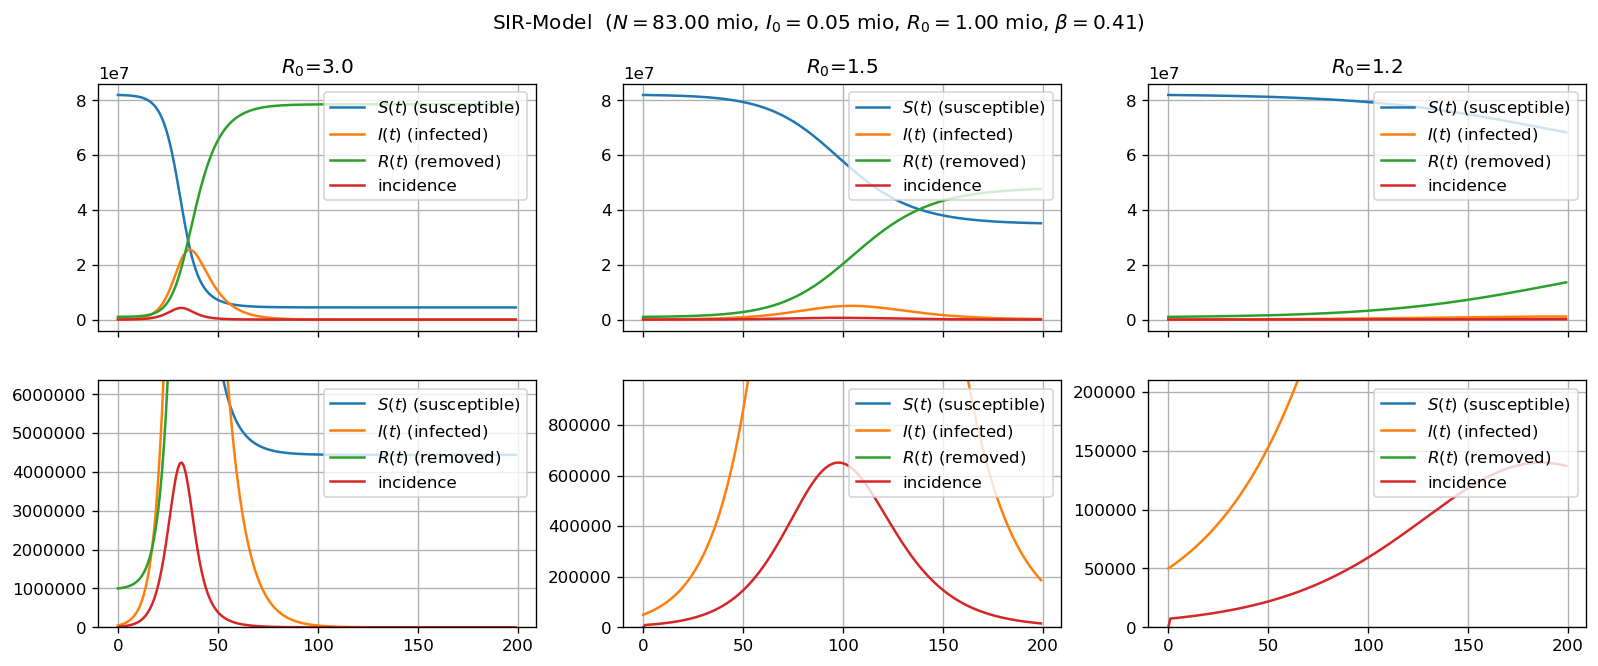

In [5]:
# setup plot with 2*3 subplots
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(16, 6), dpi=120)
x = np.arange(start=0.0, stop=n*Delta_t, step=Delta_t) # x-axis values (time in days) 
fig.suptitle("SIR-Model  ($N=%.2f$ mio, $I_0=%.2f$ mio, $R_0=%.2f$ mio, $\\beta=%.2f$)" % (N/1e6, I0/1e6, R0/1e6, beta))

# define plotting function
def my_plot(ax, title, zoom):
    if zoom:
        title = ""
        ax.set_ylim(0,int(newI.max())*1.5)
    ax.set_title(title)
    ax.plot(x, S, label='$S(t)$ (susceptible)')
    ax.plot(x, I, label='$I(t)$ (infected)')
    ax.plot(x, R, label='$R(t)$ (removed)')
    ax.plot(x, newI, label='incidence')
    ax.legend(loc='upper right')
    ax.grid()

# Run three simulations for three different reproduction rates
# (1) R_0 = 3.0
simulate(gamma*3.0, gamma)
my_plot(ax[0,0], "$R_0$=3.0", 0)
my_plot(ax[1,0], "$R_0$=3.0", 1)

# (2) R_0 reduced to 1.5
simulate(gamma*1.5, gamma)
my_plot(ax[0,1], "$R_0$=1.5", 0)
my_plot(ax[1,1], "$R_0$=1.5", 1)

# (3) R_0 reduced to 1.2
simulate(gamma*1.2, gamma)
my_plot(ax[0,2], "$R_0$=1.2", 0)
my_plot(ax[1,2], "$R_0$=1.2", 1)

### Summary of Scenario Simulations

In order to avoid potentially tens of thousand avoidable deaths caused by lack of ICU capacity, the reproduction rate $R_0$ should  be near (or best below) $1.0$. Also note that even for small starting numbers of infected persons, the exponentiel nature ("avalanche effect") of the dynamics!

## Glossary

### basic reproduction number

The basic reproduction number $R_0$ ("R naught") is defined as the average number of secondary infections that occur when one infective individual 
is introduced into a completely susceptible population. See also [replacement number](#replacement-number). 
The relationship between $R_0$ and the [recover-rate](#recocery-rate) $\gamma$ is $$R_0=\frac{\beta}{\gamma}$$

### beta

see [contact rate](#contact-rate).

### contact rate

$\beta$, the contact rate or spreading rate or infection rate is the average number of contacts of an infected individual 
per unit of time (often a single day). In the SIR model $\beta$ is the average rate at which an individual moves from compartment $S$ (susceptible) into compartment $I$ (infected).

### dynamical system 

Some examples for dynamical systems:

* In mathematics, a system in which a function describes the time dependence of a point in a geometrical space. 
* In physics, movement of a particle or ensemble of particles whose state (e.g. position, velocity etc.) varies over time.

In the context of the SIR-model the size of the three compartments vary over time.

### gamma

See [recovery rate](#recovery-rate).

### incidence

Number of new cases per unit time (usually a single day).

### incubation period

Time between exposure to a infectious desease and when first clinical symtoms show.

### infection rate

See [contact rate](#contact-rate)

### infectious period

The time period during which an infected person can **transmit** the desease to other susceptiple individuels.

### latent period

The latent period or _pre-infectious period_ is the period starting with the infection until the individuel becomes infectious (see [infectious period](#infectious-period)).

### ordinary differential equation

An ordinary [differential equation](https://en.wikipedia.org/wiki/Differential_calculus#Differential_equations) (ODE) is an equation containing a function of one independent variable and their derivatives. 

$$
y'(t) = f(t,y),\quad y(t_0) = y_0\text{ (initial condition)}
$$

For examle the above defined SIR-model is an (system of) ODE(s). Many if not most physical processes can be described by a set of differential equations. They play an very important role in the mathematical modelling of natural phenomena. We can numerically, approximately solve an ODE using Euler's method for solving ODEs.

### pre-infectious period

See [latent period](#latent-period).

### recovery rate

$\gamma$ (gamma), the recovery rate is the average rate at which an infected person recovers (and is immune to a new infection). IN the SIR model it is responsible for a change from compartment $I$ into compartment $R$.

### replacement number

The replacement number $R$ is defined as the average number of secondary infections produced by an infective individual during the infectious period. Note that at the start of the epidemic $R_0=R$. See also [basic reproduction number](basic-reproduction-number).